<a href="https://colab.research.google.com/github/Charlotte-99/Y3Project/blob/main/Map_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating mini-maps

Section to mount drive and navigate to folder with .fits files.

In [7]:
# Mount google drive folder with .fits maps
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Change directory to project folder
import os
os.chdir('/content/drive/My Drive/Project')

In [9]:
!pip install healpy

     |████████████████████████████████| 15.8MB 268kB/s 


In [10]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

## CMB map patches

In this section we extract patches from one of the three CMB maps.

First we load one of the three maps.

In [32]:
map = hp.fitsfunc.read_map('cmb_map1.fits')

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


Then we can plot this map (just to check).

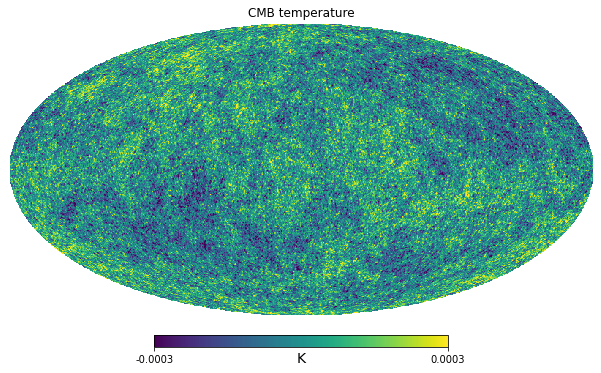

In [33]:
hp.mollview(map, min=-300e-6, max=300e-6,
            title='CMB temperature', unit='K')

Looks good! We can now start extracting random segments from this map.

## Map extraction

We will extract 33 maps from this map at random points of latitude and longitude. 

In [34]:
num_maps = 33
lon_list = np.random.randint(0, 360, size=num_maps)
lat_list = np.random.randint(-90, 90, size=num_maps)

print(lon_list)
print(lat_list)

[244 107  90 183 339 345 301 160 156 235   3 251 299 159 279 253  56  15
 255 194  81 223 333 213  72 307 165   0 270 117 159  60 268]
[ 39 -55   0  18 -47  77 -40  57 -17 -42  11 -76  86 -81  68 -30 -65  12
  64  14 -20   0  47 -64  50  79 -56 -57  24 -37   7 -73 -80]


We can use these to extract 10 degree squared patches centred on these (lon, lat) points.

In [35]:
def extract_map(map, rot, deg_side, pixel_side):
  '''
  rot must be a tuple (lon, lat, psi) where lon, lat specify where the
  centre of the extracted map will be and psi specifies a rotation.
  All of these are in units of degrees.
  '''
  reso = 60*deg_side/pixel_side
  mini_map = hp.visufunc.gnomview(map, rot=rot, xsize=pixel_side,
                                  reso=reso, return_projected_map=True,
                                  no_plot=True)
  return mini_map

In [36]:
deg_side = 10
pixel_side = 200

mini_maps = [None]*num_maps
for n in range(num_maps):
  mini_maps[n] = extract_map(map,
                             (lon_list[n], lat_list[n], 0),
                             deg_side, pixel_side)
  print(f'Finished map {n+1}')

Finished map 1
Finished map 2
Finished map 3
Finished map 4
Finished map 5
Finished map 6
Finished map 7
Finished map 8
Finished map 9
Finished map 10
Finished map 11
Finished map 12
Finished map 13
Finished map 14
Finished map 15
Finished map 16
Finished map 17
Finished map 18
Finished map 19
Finished map 20
Finished map 21
Finished map 22
Finished map 23
Finished map 24
Finished map 25
Finished map 26
Finished map 27
Finished map 28
Finished map 29
Finished map 30
Finished map 31
Finished map 32
Finished map 33


We can then turn this list into an array of size (num_maps, pixel_side, pixel_side).

In [37]:
mini_maps = np.array(mini_maps)
mini_maps.shape

(33, 200, 200)

We can now save this array to a .npy file.

In [38]:
np.save('cmb_map1_extracts.npy', mini_maps)

Double check some of the images we've extracted to see if they're good...

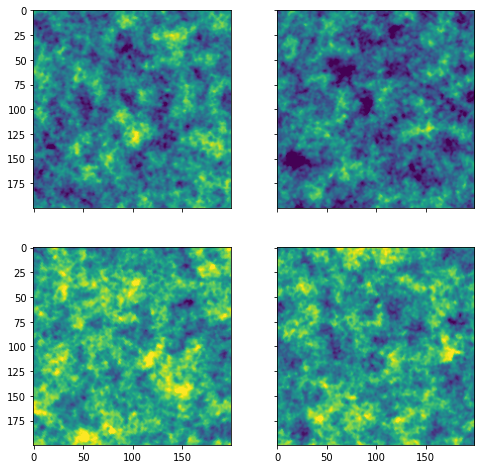

In [39]:
which_ones = np.random.randint(0, num_maps, 4)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,
                         figsize=(8, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(mini_maps[which_ones[i]], vmin=-300e-6, vmax=300e-6)